In [1]:
#make sure your drive path is correct! 
# macOS/OS X
# drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/'

# Windows (a good guess)
# drive_path = 'e:/data/dynamic-brain-workshop/brain_observatory_cache'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache'

# AWS
drive_path = '/data/dynamic-brain-workshop/brain_observatory_cache/'

In [2]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import sys
import h5py
from scipy import signal as sig
from sklearn.decomposition import FastICA, PCA
import swdb2017.brain_observatory.utilities.Plot_cell_rf_and_image as crfimage
from pydeep.preprocessing import ICA, ZCA
import pydeep.misc.io as io
import pydeep.misc.visualization as vis
import skimage as si

# import matplotlib.patches as patches

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import the Brain Observatory cache from allensdk.core.brain_observatory_cache
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
print manifest_file

boc = BrainObservatoryCache(manifest_file=manifest_file)

/data/dynamic-brain-workshop/brain_observatory_cache/brain_observatory_manifest.json


In [4]:
# Load the experimental data
data_set = boc.get_ophys_experiment_data(501498760)

# Read in the array of images
scenes = data_set.get_stimulus_template('natural_scenes')

# The natural scenes stimulus table describes when each scene is on the screen
stim_table = data_set.get_stimulus_table('natural_scenes')

MemoryError: 

In [5]:
# Hacky way to make the images divisible acros x and y axes 
#(you will have to change this once you successfully import the template files, but is fine for now)
scenes = scenes[:,0:912,0:1152]

In [6]:
# Create a 3D array of image patches and an ICA input array by looping through the 'scenes'
patch_size = 24
n_images = scenes.shape[0]
im_height = scenes.shape[1]
im_width = scenes.shape[2]
n_i = im_height/patch_size
n_j = im_width/patch_size
npatches = n_i*n_j*n_images;
ica_inputs = np.zeros((npatches,patch_size*patch_size))
patch_array = np.zeros((npatches,patch_size,patch_size))
all_ica_inputs = np.zeros((npatches,patch_size*patch_size))
for p in range(n_images):
    pic = scenes[p,:,:]
    for i in range(len(pic[:,1])/patch_size):
        for j in range(len(pic[1,:])/patch_size):        
            patch = pic[i*patch_size:i*patch_size+patch_size,j*patch_size:j*patch_size+patch_size]
            ica_inputs[(p*n_i*n_j)+(i*n_j)+j] = np.ravel(patch) 
            patch_array[(p*n_i*n_j)+(i*n_j)+j,:,:] = patch;

In [ ]:
# perform ICA
ica = FastICA(n_components=100, algorithm='parallel', whiten=True)
ica.fit(ica_inputs)
filters = ica.components_

In [ ]:
# plot filters
plt.figure()
for i, f in enumerate(filters):
    plt.subplot(10, 10, i + 1)
    plt.imshow(f.reshape(patch_size, patch_size), cmap="gray")
    plt.axis("off")
plt.show()

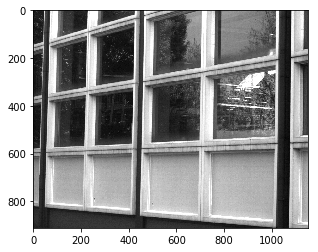

In [57]:
a = scenes[85]
plt.imshow(a,cmap='gray')

In [49]:
b = filters.gabor_kernel(0.01, theta=np.pi/4, bandwidth=100, sigma_x=25, sigma_y=50, n_stds=3, offset=0)

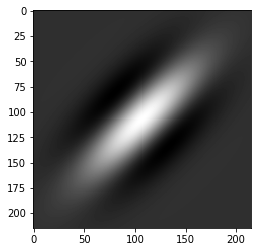

In [50]:
plt.imshow(np.real(b),cmap='gray')

In [51]:
conv1 = convolveim(a,b, mode = 'constant')

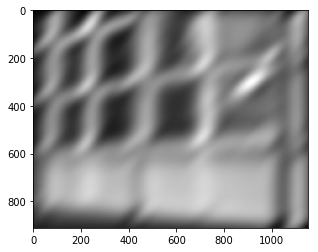

In [52]:
plt.imshow(conv1.real,cmap='gray')